In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr



import sys
import os
import git
from pathlib import Path

REPO_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
sys.path.append(str(REPO_DIR))



In [3]:
DATA_DIR = REPO_DIR/"data"
plk18_data_dir =  DATA_DIR/ "plk18_spectra/"


In [4]:
modes = xr.DataArray(['tt','te','ee'],name="modes")
modes
for v in modes.values:
    print(v)

tt
te
ee


In [5]:

modes = ['tt','te','ee']
data_sets = []
for mode in modes:
    data = np.loadtxt(plk18_data_dir/ f"COM_PowerSpect_CMB-{mode.upper()}-full_R3.01.txt")
    data_sets.append(xr.Dataset({"cl":xr.DataArray(data[:,1],dims="ell",coords={"ell":data[:,0]}),
                           "var_cl":xr.DataArray(data[:,2:],dims=("ell","var_dir"),coords={"ell":data[:,0],"var_dir":["-","+"]})}))       
planck18_data = xr.concat(data_sets,dim=xr.Variable("mode",modes))
    

In [16]:
planck18_data['res_factor_cl'] = 1/planck18_data.cl
planck18_data['res_factor_cl']['te']=1/np.sqrt(planck18_data.cl.sel(mode='tt')*planck18_data.cl.sel(mode='ee'))

planck18_data.cl*planck18_data.res_factor_cl

/home/mcmeiers/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


<xarray.DataArray (mode: 3, ell: 2507)>
array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ..., nan, nan, nan],
       [ 1.,  1.,  1., ..., nan, nan, nan]])
Coordinates:
  * ell      (ell) float64 2.0 3.0 4.0 5.0 ... 2.506e+03 2.507e+03 2.508e+03
  * mode     (mode) <U2 'tt' 'te' 'ee'

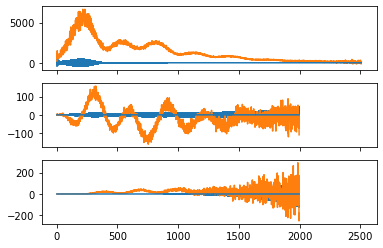

In [12]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(3,sharex=True)
for mode, ax in zip(modes,axs):
    ax.errorbar(x=planck18_data.ell,
                y=planck18_data.cl.loc[mode]*,
                yerr=planck18_data.var_cl.loc[mode].values.T,)
    ax.plot(planck18_data.ell,
            planck18_data.cl.loc[mode])

In [131]:
planck18_data.var_cl.loc['tt'].values

array([[ 132.369   ,  533.062   ],
       [ 450.471   , 1212.308   ],
       [ 294.111   ,  666.469   ],
       ...,
       [ 111.110198,  111.110198],
       [ 111.4274  ,  111.4274  ],
       [ 111.716422,  111.716422]])

In [2]:
CWD = Path.cwd()
DATA_DIR = CWD/"data/"


spectra_modes = ['tt',"te","ee"]

# The data file columns give Dℓ = ℓ(ℓ+1)Cℓ / 2π in units of μK2, and the lower and upper 68% uncertainties. 
planck_data = {}
for mode in spectra_modes:
    data = pd.read_csv(DATA_DIR/"planck"/ f"COM_PowerSpect_CMB-{mode.upper()}-full_R3.01.txt", delim_whitespace=True, escapechar='#')
    planck_data[mode] = data['cl']
    planck_data[r"$+\sigma_{Dl"+f"{mode}$"] = data['+dDl']
    planck_data[r"$-\sigma_{Dl"+f"{mode}$"] = data['-dDl']



FileNotFoundError: [Errno 2] No such file or directory: '/home/mcmeiers/Projects/gdm_cosmology/workspace/scratch/data/planck/COM_PowerSpect_CMB-TT-full_R3.01.txt'

In [40]:
cls_of_mdl
ell_min=2
ell_max=2508
modes=("tt", "te", "ee")
fig=None

if fig is None:
    fig, axs = plt.subplots(len(modes), sharex=True, figsize=(14, 8))
    fig.subplots_adjust(hspace=0)
else:
    axs = fig.gca()

if len(modes) == 1:
    axs = [axs]

assert len(modes) == len(axs)
assert ell_min < ell_max

labels = []
for mdl, cls in cls_of_mdl.items():
    ell_mask = (cls["ell"] >= ell_min) & (cls["ell"] <= ell_max)
    ells = cls["ell"][ell_mask]
    labels.append(mdl)
    for mode, ax in zip(modes, axs):
        ax.plot(ells, cls[mode][ell_mask], label=mdl)
        ax.set_ylabel(
            r"$\ell(\ell+1)/(2\pi)\,C^{" + str(mode) + "}_\ell\;(\mu \mathrm{K}^2)$"
        )

plt.xlabel(r"$\ell$")
fig.legend(labels, loc="right")

if len(modes) == 1:
    axs = axs[0]

return fig

In [57]:
pd.read_csv(Planck_data_path[0], delim_whitespace=True, escapechar='#')

,l,Dl,-dDl,+dDl
0,2.0,225.895000,132.369000,533.062000
1,3.0,936.920000,450.471000,1212.308000
2,4.0,692.238000,294.111000,666.469000
3,5.0,1501.705000,574.432000,1155.804000
4,6.0,557.611000,201.242000,375.763000
...,...,...,...,...
2502,2504.0,212.915616,110.537143,110.537143
2503,2505.0,54.752355,110.824874,110.824874
2504,2506.0,-149.315007,111.110198,111.110198
2505,2507.0,-71.474213,111.427400,111.427400


In [46]:
data =pd.read_csv(DATA_DIR/"planck"/ f"COM_PowerSpect_CMB-{'tt'.upper()}-full_R3.01.txt", delim_whitespace=True, escapechar='#')

In [47]:
data['Dl']

0        225.895000
1        936.920000
2        692.238000
3       1501.705000
4        557.611000
           ...     
2502     212.915616
2503      54.752355
2504    -149.315007
2505     -71.474213
2506      51.632731
Name: Dl, Length: 2507, dtype: float64

In [52]:
xr.DataArray(data['Dl'], coordinates={'ell':data['l']})

KeyError: 'l'

In [55]:
data.keys()

Index([' l', 'Dl', '-dDl', '+dDl'], dtype='object')

In [32]:
da = xr.DataArray(
   ...:     np.arange(6).reshape(2, 3), [("x", ["a", "b"]), ("y", [10, 20, 30])]
   ...: )


In [33]:
da

<xarray.DataArray (x: 2, y: 3)>
array([[0, 1, 2],
       [3, 4, 5]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 10 20 30

In [35]:
da.isel(x=slice(None, 1))

<xarray.DataArray (x: 1, y: 3)>
array([[0, 1, 2]])
Coordinates:
  * x        (x) <U1 'a'
  * y        (y) int64 10 20 30